# How To

Crib notes on some useful tasks and procedures
* Python
* Jupyter


## FAQ


Q: What are the Jupyter notebook commands? 


A: Look [here](http://jupyter-notebook.readthedocs.org/en/latest/notebook.html) and 
[also here](http://nbviewer.jupyter.org/github/jupyter/notebook/tree/master/docs/source/examples/Notebook/)


Q: A good book on Python-based data science? 


A: Jake Vanderplas' [___The Python Data Science Handbook___](http://shop.oreilly.com/product/0636920034919.do)


Q: How does plotting work?


A: See the section below on plotting basics


Q: What about slicing up multi-dimensional data?


A: This topic is out of scope; but you can get a view of it by looking into
[this notebook](http://nbviewer.jupyter.org/url/uwescience.github.io/python-seminar-2015/notebooks/xray_and_dask.ipynb)
by Anthony Arendt


Q: How does one convert an IPython Notebook to a slide deck from an IPython Notebook?

A: [Install _reveal_ from github](https://github.com/hakimel/reveal.js/)


Q: How does one include maps in an IPython Notebook?

A: [Check the cartopy installation instructions](http://scitools.org.uk/cartopy/docs/latest/index.html)

## Plotting basics

This section blurs the line between being a mathematician and being a coder. Learning to code in Python 
is a big investment of time; and it is out of scope here to try and support that process. However we can
often get by with a minimal set of examples that we can modify. To that end here is a quick comment to
get started on this section.


The following code is worth running in its own cell: 


```
    a = 'abcdefghijklmnopqrstuvwxyz'
    for b in a: 
        print(b)
```


This is an example of a data structure in Python: **`a`** is a string that works as an ordered set of individual characters.

Likewise we have the **list** data structure delineated in Python using square brackets **`[ ... ]`**


```
    x = [3, 4, 5, 6, 7]
    print(x)
    for xx in x: 
        print(xx)
```


Data structures are often ordered sets where the elements are examined 
in sequence, for example in creating a data chart. Such data structures are called *enumerable*.


Now to plotting!


* The **`matplotlib`** library is the basis for plotting used here. It is not simple but it has capabilities.
    * Often **`pyplot`** is imported from **`matplotlib`** and abbreviated as **`plt`**
    * **`plt`** is a stateful interface: There is a current figure and a current axis or axes
    * The **`plt`** **`figure`** (abbreviated **`fig`**) is a canvas where drawing can occur; highest level of abstraction
    * The **`plt`** **`axis`** (abbreviated **`ax`** or plural **`axs`**) is then a coordinate space where graphics are drawn


A simple starting point is to set up two **enumerable** data structures (specifically **lists**) of the 
same length. We first import the **`pyplot`** interface to **`matplotlib`** and then issue two subsequent
commands. The first establishes a *figure* containing one or more *axes*.  The second command
plots the second list against the first. The following example
establishes a 3-across by 2-down grid of six axes; but only populates three of those six spots with charts. 
The second chart starts to illustrate customization.
The third chart shows that the ordinate can be ommitted; by default it becomes 0, 1, 2, 3, ...


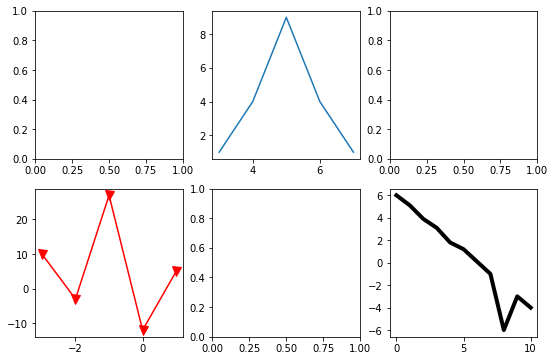

In [32]:
from matplotlib import pyplot as plt
fig,axs=plt.subplots(2, 3, figsize=(9, 6))
axs[0][1].plot([3,4,5,6,7],[1,4,9,4,1])
axs[1][0].plot([-3,-2,-1,0,1],[10,-3,27,-12,5], color='red', marker='v', ms=9)
axs[1][2].plot([6,5.1,3.9,3.1,1.8,1.2,0.1,-1,-6, -3, -4], color='black', linewidth=4)

[Text(0.5, 1.0, 'and yet another')]

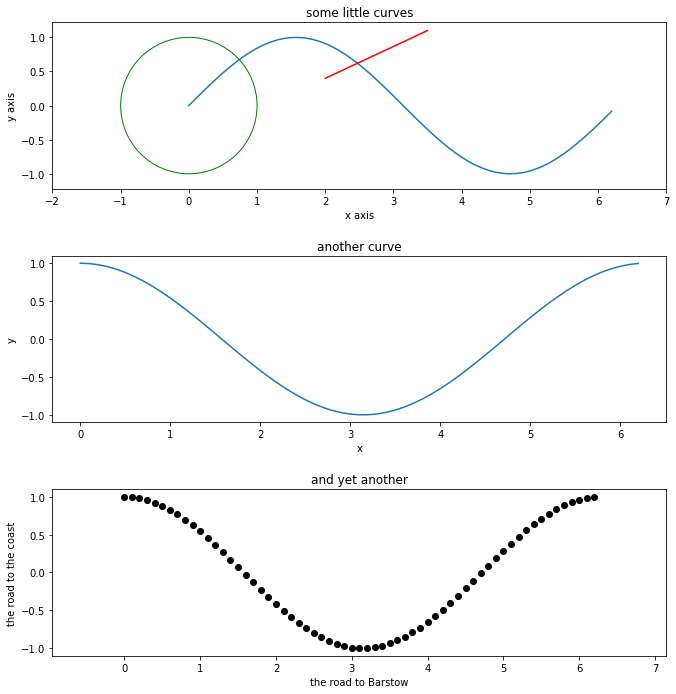

In [20]:
from matplotlib import pyplot as plt
import numpy as np

myPlotSize = 11
fig, ax = plt.subplots(3, figsize=(myPlotSize, myPlotSize))

x = np.arange(0, 2*np.pi, .1)
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))
ax[2].scatter(x, np.cos(x), color='k')

ax[0].add_patch(plt.Circle((0, 0), 1, color = 'g', fill=False))
ax[0].axis('equal')

ax[2].axis('equal')

x1 = 2.0
x2 = 3.5
y1 = 0.4
y2 = 1.1

ax[0].plot([x1, x2], [y1, y2], color='r')

ax[0].set_xlim(-2, 7)
ax[0].set_ylim(-2, 2)

ax[0].set(xlabel='x axis', ylabel = 'y axis', title='some little curves')

fig.subplots_adjust(left=None, bottom=0.1, right=None, top=0.9, wspace=None, hspace=.4)

ax[1].set(xlabel='x', ylabel = 'y')
ax[1].set(title='another curve')

ax[2].set(xlabel='the road to Barstow', ylabel = 'the road to the coast')
ax[2].set(title='and yet another')

## Creating 2D images from arrays

Here is a sequence of revisions of a color-coded function of a 2D space. The first one came from
stack overflow and the subsequent versions are just playing around: Making it simpler and a little
code golf.

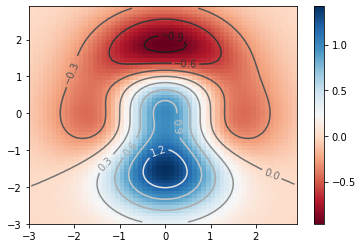

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def z_func(x, y):
    return (1 - (x ** 2 + y ** 3)) * np.exp(-(x ** 2 + y ** 2) / 2)

x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)
x_center = 0.5 * (x[:-1] + x[1:])
y_center = 0.5 * (y[:-1] + y[1:])

X, Y = np.meshgrid(x_center, y_center)
Z = z_func(X, Y)

# pcolormesh needs the pixel edges for x and y
# and with default flat shading, Z needs to be evaluated at the pixel center
plot = plt.pcolormesh(x, y, Z, cmap='RdBu', shading='flat')

# contour needs the centers
cset = plt.contour(X, Y, Z, cmap='gray')
plt.clabel(cset, inline=True)

plt.colorbar(plot)
# plt.savefig('plot_z_flat.png')

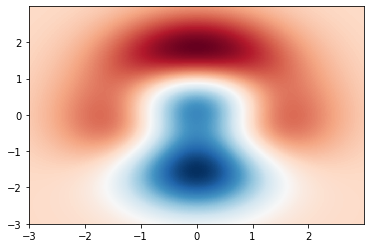

In [6]:
# simpler version

def z_func(x, y): return (1 - (x ** 2 + y ** 3)) * np.exp(-(x ** 2 + y ** 2) / 2)

x = np.arange(-3.0, 3.0, 0.01)
y = np.arange(-3.0, 3.0, 0.01)
x_center = 0.5 * (x[:-1] + x[1:])
y_center = 0.5 * (y[:-1] + y[1:])

X, Y = np.meshgrid(x_center, y_center)
Z = z_func(X, Y)

# pcolormesh needs the pixel edges for x and y
# and with default flat shading, Z needs to be evaluated at the pixel center
plot = plt.pcolormesh(x, y, Z, cmap='RdBu', shading='flat')
# plot = plt.pcolormesh(x, y, Z, cmap='RdBu')


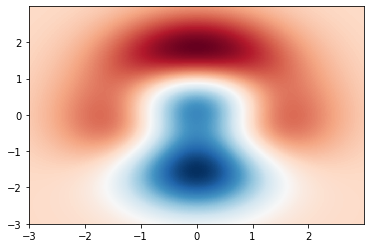

In [7]:
# simpler version

def z_func(x, y): return (1 - (x ** 2 + y ** 3)) * np.exp(-(x ** 2 + y ** 2) / 2)

x = np.arange(-3.0, 3.0, 0.01)
y = np.arange(-3.0, 3.0, 0.01)
x_center = 0.5 * (x[:-1] + x[1:])
y_center = 0.5 * (y[:-1] + y[1:])

X, Y = np.meshgrid(x_center, y_center)
Z = z_func(X, Y)

# pcolormesh needs the pixel edges for x and y
# and with default flat shading, Z needs to be evaluated at the pixel center
# plot = plt.pcolormesh(x, y, Z, cmap='RdBu', shading='flat')
plot = plt.pcolormesh(x, y, Z, cmap='RdBu')

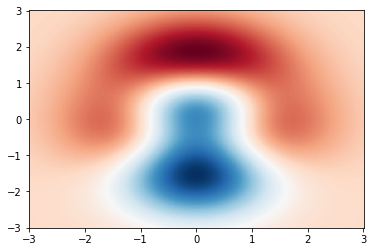

In [18]:
# simpler version
import numpy as np
import matplotlib.pyplot as plt

def z(x, y): return (1 - (x ** 2 + y ** 3)) * np.exp(-(x ** 2 + y ** 2) / 2)

x = np.arange(-3.0, 3.01, 0.01)
y = np.arange(-3.0, 3.01, 0.01)
x_center = 0.5 * (x[:-1] + x[1:])
y_center = 0.5 * (y[:-1] + y[1:])

X, Y = np.meshgrid(x, y)               # or use x_center, y_center
Z = z(X, Y)

# pcolormesh needs the pixel edges for x and y
# and with default flat shading, Z needs to be evaluated at the pixel center
# plot = plt.pcolormesh(x, y, Z, cmap='RdBu', shading='flat')
plot = plt.pcolormesh(x, y, Z, cmap='RdBu')

In [21]:
Z.shape

(601, 601)

(-3.005, 3.004999999999872, -3.005, 3.004999999999872)

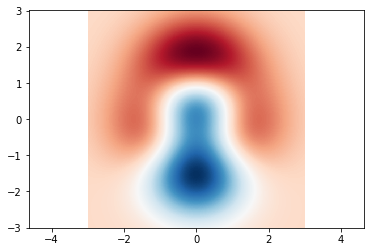

In [25]:
# simpler version
import numpy as np
import matplotlib.pyplot as plt

def z(x, y): return (1 - (x ** 2 + y ** 3)) * np.exp(-(x ** 2 + y ** 2) / 2)

x = np.arange(-3.0, 3.01, 0.01)
y = np.arange(-3.0, 3.01, 0.01)
X, Y = np.meshgrid(x, y)
Z = z(X, Y)
plot = plt.pcolormesh(x, y, Z, cmap='RdBu')
plt.axis('equal')

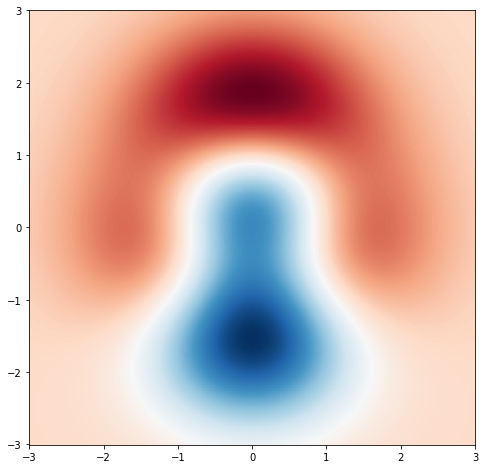

In [33]:
# simpler version
import numpy as np
import matplotlib.pyplot as plt

def z(x, y): return (1 - (x ** 2 + y ** 3)) * np.exp(-(x ** 2 + y ** 2) / 2)

x = np.arange(-3.0, 3.01, 0.01)
y = np.arange(-3.0, 3.01, 0.01)
X, Y = np.meshgrid(x, y)
Z = z(X, Y)
fig, ax = plt.subplots(figsize=(8,8))
ax.pcolormesh(x, y, Z, cmap='RdBu')
plt.show()

## Colorbars and scalar fields


Take a look at the logistics map notebook under the topic folder 'logistics'. 

## Finding available options


We want the interface to suggest available options. For each of the following lines: Place the cursor
directly after the initial text and hit the \<tab\> key.

In [ ]:
plt                                                   # tab does nothing
plt.                                                  # tab lists many many available methods
plt.plot                                              # lists three possible methods
plt.sub                                               # lists six possible methods
plt.subplots                                          # try <shift>+<tab> to get a pop-up documentation box   

#### Additional access options

* < shift > + < tab > + < tab > gives an extended summary
* < shift > + < tab > + < tab > + < tab > + < tab > brings up an extended summary in a pop-up window
* **`plt.subplots?`** shows documentation in a separate window (dismiss using X at upper right)
* **`plt.subplots??`** shows the source code (run the following cell)

In [33]:
plt.subplots??

## Inserting graphics from a GitHub repository

This code makes a temporary copy of a github-based image and displays it in the notebook. This can make use 
of images that are not part of the working repository.


```
import requests, shutil
from pathlib import Path
from PIL import Image

username, repo, folder, fnm = 'robfatland', 'othermathclub', 'images/egon', 'shingle_house.jpg'
ftmp = str(Path.home()) + '/tmp_' + fnm
f = 'https://raw.githubusercontent.com/' + username + '/' + repo + '/master/' + folder + '/' + fnm
a = requests.get(f, stream = True)
if a.status_code == 200:
    with open(ftmp, 'wb') as f: a.raw.decode_content = True; shutil.copyfileobj(a.raw, f)
Image.open(ftmp).resize((500,300))
```

# LaTeX

### Matrices


$
A=\left[{\begin{array}{cc}
   a & b \\
   c & d \\
  \end{array}}\right]
\; \; \; $
has an inverse
$\; \; \; A^{-1} = \frac{1}{det A} \cdot \left[{\begin{array}{cc}
   d & -b \\
   -c & a \\
  \end{array} }\right]$. 
  
  
  Writing $x$ and $y$ as a column vector
$\tilde{v}=\left[{\begin{array}{c}x\\y\end{array}}\right]$
and the result of the transform as
$\tilde{k}=\left[{\begin{array}{c}m\\n\end{array}}\right]$
we have $A \tilde{v} = \tilde{k}$ and $\tilde{v}=A^{-1}\tilde{k}$.

# Python

Crib notes on some useful tasks and procedures



## FAQ


Q: What are the Jupyter notebook commands? 

A: Look [here](http://jupyter-notebook.readthedocs.org/en/latest/notebook.html) and 
[also here](http://nbviewer.jupyter.org/github/jupyter/notebook/tree/master/docs/source/examples/Notebook/)


Q: A good book on Python-based data science? 

A: Jake Vanderplas' [___The Python Data Science Handbook___](http://shop.oreilly.com/product/0636920034919.do)

Q: How does plotting work?

A: See the section below on plotting basics

Q: What about slicing up multi-dimensional data?

A: This topic is out of scope; but you can get a view of it by looking into
[this notebook](http://nbviewer.jupyter.org/url/uwescience.github.io/python-seminar-2015/notebooks/xray_and_dask.ipynb)
by Anthony Arendt


Q: How does one convert an IPython Notebook to a slide deck from an IPython Notebook?

A: [Install _reveal_ from github](https://github.com/hakimel/reveal.js/)


Q: How does one include maps in an IPython Notebook?

A: [Check the cartopy installation instructions](http://scitools.org.uk/cartopy/docs/latest/index.html)

## Plotting basics

This section blurs the line between being a mathematician and being a coder. Learning to code in Python 
is a big investment of time; and it is out of scope here to try and support that process. However we can
often get by with a minimal set of examples that we can modify. To that end here is a quick comment to
get started on this section.


The following code is worth running in its own cell: 


```
    a = 'abcdefghijklmnopqrstuvwxyz'
    for b in a: 
        print(b)
```


This is an example of a data structure in Python: **`a`** is a string that works as an ordered set of individual characters.

Likewise we have the **list** data structure delineated in Python using square brackets **`[ ... ]`**


```
    x = [3, 4, 5, 6, 7]
    print(x)
    for xx in x: 
        print(xx)
```


Data structures are often ordered sets where the elements are examined 
in sequence, for example in creating a data chart. Such data structures are called *enumerable*.


Now to plotting!


* The **`matplotlib`** library is the basis for plotting used here. It is not simple but it has capabilities.
    * Often **`pyplot`** is imported from **`matplotlib`** and abbreviated as **`plt`**
    * **`plt`** is a stateful interface: There is a current figure and a current axis or axes
    * The **`plt`** **`figure`** (abbreviated **`fig`**) is a canvas where drawing can occur; highest level of abstraction
    * The **`plt`** **`axis`** (abbreviated **`ax`** or plural **`axs`**) is then a coordinate space where graphics are drawn


A simple starting point is to set up two **enumerable** data structures (specifically **lists**) of the 
same length. We first import the **`pyplot`** interface to **`matplotlib`** and then issue two subsequent
commands. The first establishes a *figure* containing one or more *axes*.  The second command
plots the second list against the first. The following example
establishes a 3-across by 2-down grid of six axes; but only populates three of those six spots with charts. 
The second chart starts to illustrate customization.
The third chart shows that the ordinate can be ommitted; by default it becomes 0, 1, 2, 3, ...


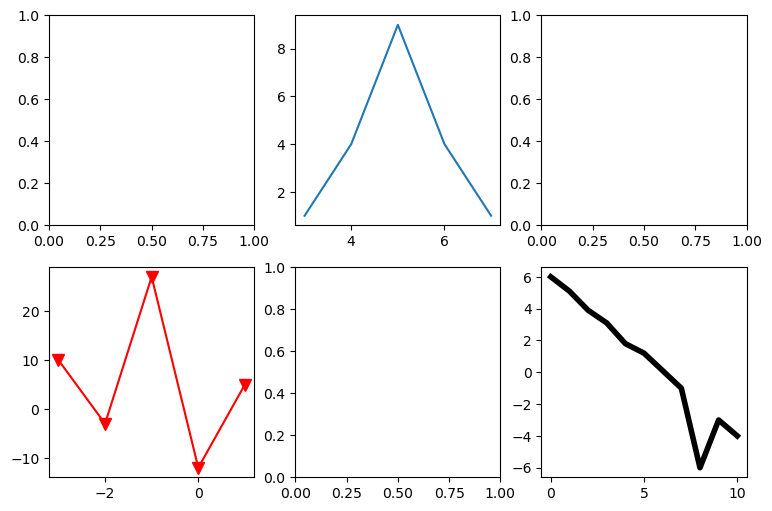

In [1]:
from matplotlib import pyplot as plt
fig,axs=plt.subplots(2, 3, figsize=(9, 6))
axs[0][1].plot([3,4,5,6,7],[1,4,9,4,1])
axs[1][0].plot([-3,-2,-1,0,1],[10,-3,27,-12,5], color='red', marker='v', ms=9)
axs[1][2].plot([6,5.1,3.9,3.1,1.8,1.2,0.1,-1,-6, -3, -4], color='black', linewidth=4)

[Text(0.5, 1.0, 'and yet another')]

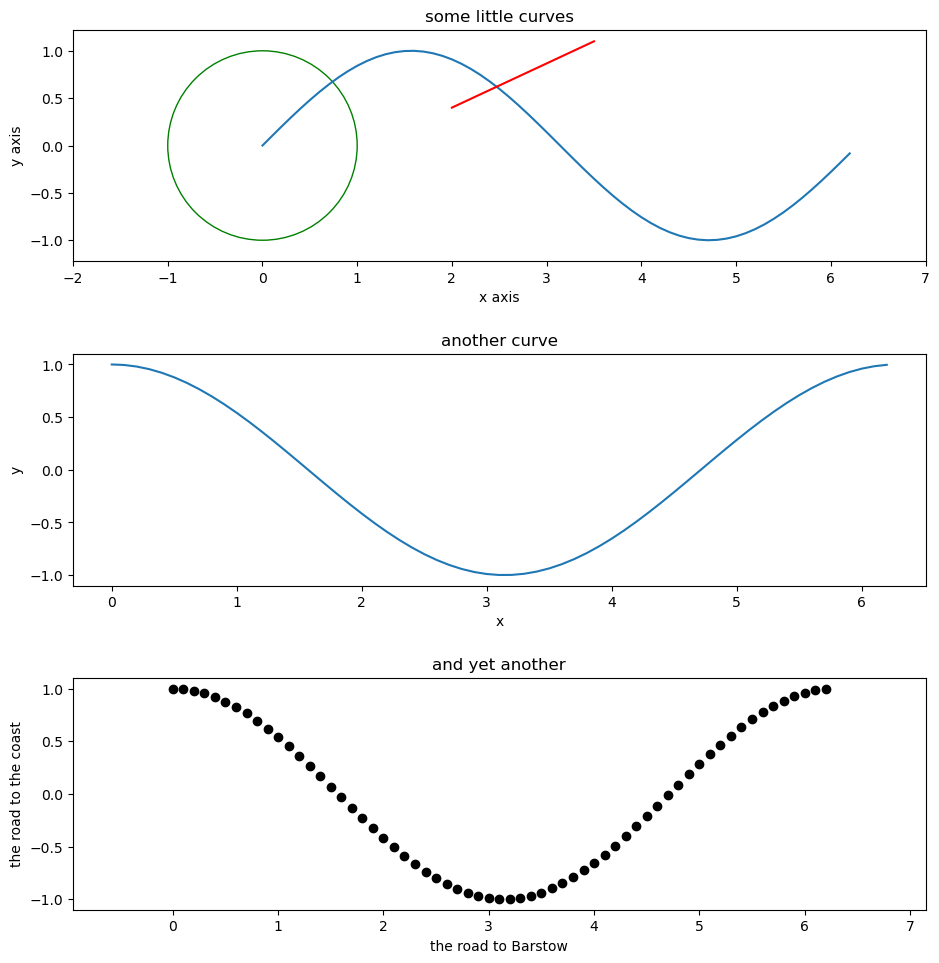

In [2]:
from matplotlib import pyplot as plt
import numpy as np

myPlotSize = 11
fig, ax = plt.subplots(3, figsize=(myPlotSize, myPlotSize))

x = np.arange(0, 2*np.pi, .1)
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))
ax[2].scatter(x, np.cos(x), color='k')

ax[0].add_patch(plt.Circle((0, 0), 1, color = 'g', fill=False))
ax[0].axis('equal')

ax[2].axis('equal')

x1 = 2.0
x2 = 3.5
y1 = 0.4
y2 = 1.1

ax[0].plot([x1, x2], [y1, y2], color='r')

ax[0].set_xlim(-2, 7)
ax[0].set_ylim(-2, 2)

ax[0].set(xlabel='x axis', ylabel = 'y axis', title='some little curves')

fig.subplots_adjust(left=None, bottom=0.1, right=None, top=0.9, wspace=None, hspace=.4)

ax[1].set(xlabel='x', ylabel = 'y')
ax[1].set(title='another curve')

ax[2].set(xlabel='the road to Barstow', ylabel = 'the road to the coast')
ax[2].set(title='and yet another')

## Creating 2D images from arrays

Here is a sequence of revisions of a color-coded function of a 2D space. The first one came from
stack overflow and the subsequent versions are just playing around: Making it simpler and a little
code golf.

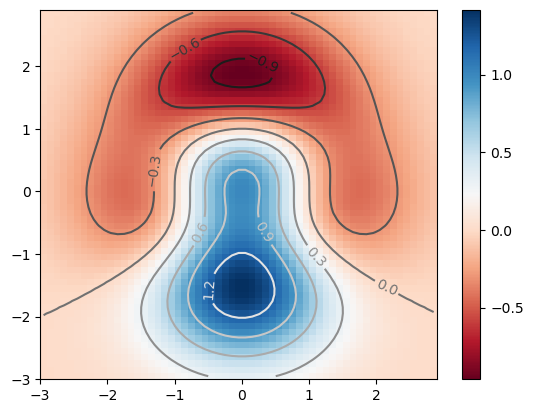

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def z_func(x, y):
    return (1 - (x ** 2 + y ** 3)) * np.exp(-(x ** 2 + y ** 2) / 2)

x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)
x_center = 0.5 * (x[:-1] + x[1:])
y_center = 0.5 * (y[:-1] + y[1:])

X, Y = np.meshgrid(x_center, y_center)
Z = z_func(X, Y)

# pcolormesh needs the pixel edges for x and y
# and with default flat shading, Z needs to be evaluated at the pixel center
plot = plt.pcolormesh(x, y, Z, cmap='RdBu', shading='flat')

# contour needs the centers
cset = plt.contour(X, Y, Z, cmap='gray')
plt.clabel(cset, inline=True)

plt.colorbar(plot)
# plt.savefig('plot_z_flat.png')

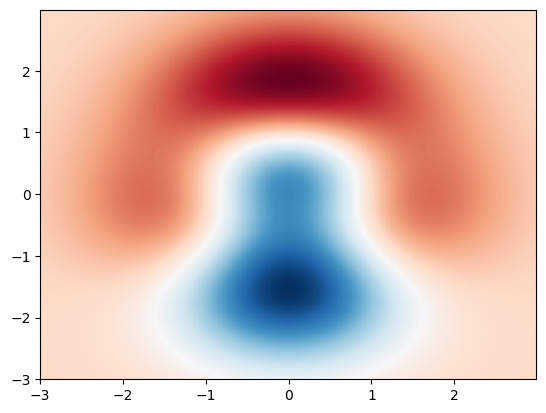

In [4]:
# simpler version

def z_func(x, y): return (1 - (x ** 2 + y ** 3)) * np.exp(-(x ** 2 + y ** 2) / 2)

x = np.arange(-3.0, 3.0, 0.01)
y = np.arange(-3.0, 3.0, 0.01)
x_center = 0.5 * (x[:-1] + x[1:])
y_center = 0.5 * (y[:-1] + y[1:])

X, Y = np.meshgrid(x_center, y_center)
Z = z_func(X, Y)

# pcolormesh needs the pixel edges for x and y
# and with default flat shading, Z needs to be evaluated at the pixel center
plot = plt.pcolormesh(x, y, Z, cmap='RdBu', shading='flat')
# plot = plt.pcolormesh(x, y, Z, cmap='RdBu')


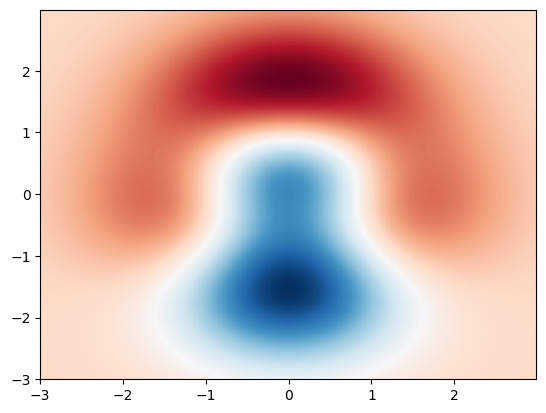

In [5]:
# simpler version

def z_func(x, y): return (1 - (x ** 2 + y ** 3)) * np.exp(-(x ** 2 + y ** 2) / 2)

x = np.arange(-3.0, 3.0, 0.01)
y = np.arange(-3.0, 3.0, 0.01)
x_center = 0.5 * (x[:-1] + x[1:])
y_center = 0.5 * (y[:-1] + y[1:])

X, Y = np.meshgrid(x_center, y_center)
Z = z_func(X, Y)

# pcolormesh needs the pixel edges for x and y
# and with default flat shading, Z needs to be evaluated at the pixel center
# plot = plt.pcolormesh(x, y, Z, cmap='RdBu', shading='flat')
plot = plt.pcolormesh(x, y, Z, cmap='RdBu')

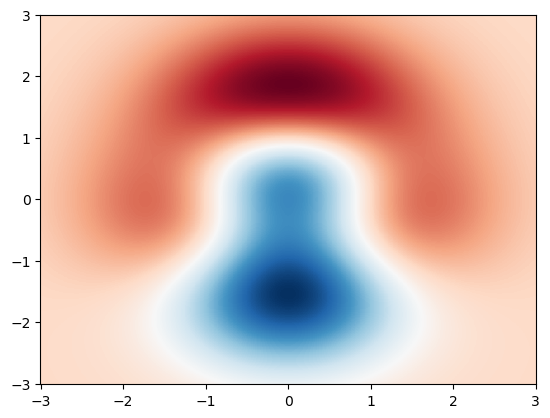

In [6]:
# simpler version
import numpy as np
import matplotlib.pyplot as plt

def z(x, y): return (1 - (x ** 2 + y ** 3)) * np.exp(-(x ** 2 + y ** 2) / 2)

x = np.arange(-3.0, 3.01, 0.01)
y = np.arange(-3.0, 3.01, 0.01)
x_center = 0.5 * (x[:-1] + x[1:])
y_center = 0.5 * (y[:-1] + y[1:])

X, Y = np.meshgrid(x, y)               # or use x_center, y_center
Z = z(X, Y)

# pcolormesh needs the pixel edges for x and y
# and with default flat shading, Z needs to be evaluated at the pixel center
# plot = plt.pcolormesh(x, y, Z, cmap='RdBu', shading='flat')
plot = plt.pcolormesh(x, y, Z, cmap='RdBu')

In [7]:
Z.shape

(601, 601)

(-3.005, 3.004999999999872, -3.005, 3.004999999999872)

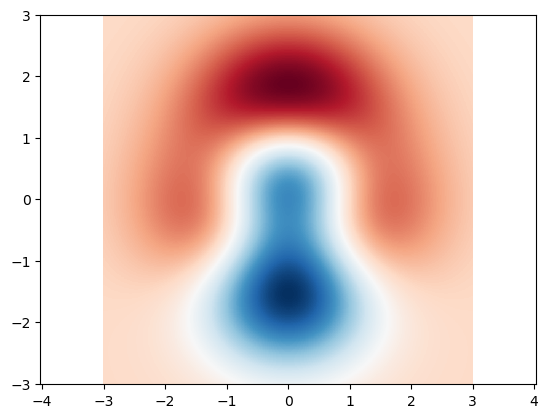

In [8]:
# simpler version
import numpy as np
import matplotlib.pyplot as plt

def z(x, y): return (1 - (x ** 2 + y ** 3)) * np.exp(-(x ** 2 + y ** 2) / 2)

x = np.arange(-3.0, 3.01, 0.01)
y = np.arange(-3.0, 3.01, 0.01)
X, Y = np.meshgrid(x, y)
Z = z(X, Y)
plot = plt.pcolormesh(x, y, Z, cmap='RdBu')
plt.axis('equal')

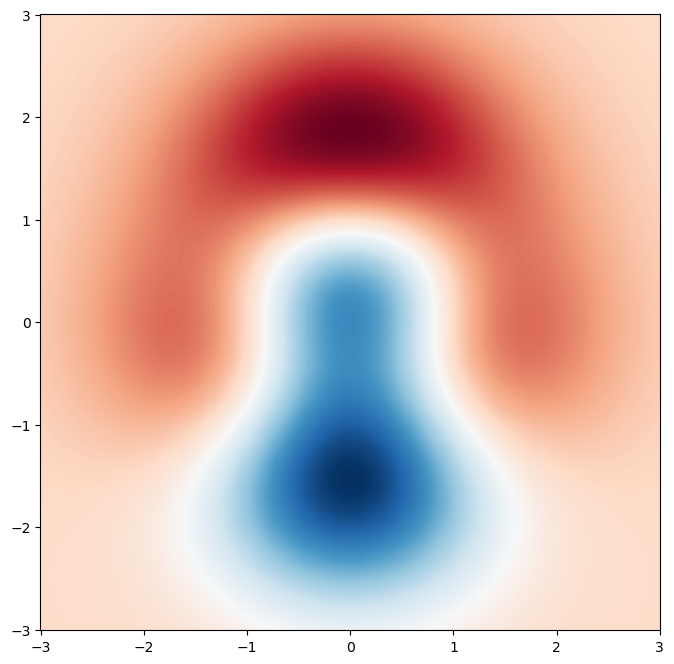

In [9]:
# simpler version
import numpy as np
import matplotlib.pyplot as plt

def z(x, y): return (1 - (x ** 2 + y ** 3)) * np.exp(-(x ** 2 + y ** 2) / 2)

x = np.arange(-3.0, 3.01, 0.01)
y = np.arange(-3.0, 3.01, 0.01)
X, Y = np.meshgrid(x, y)
Z = z(X, Y)
fig, ax = plt.subplots(figsize=(8,8))
ax.pcolormesh(x, y, Z, cmap='RdBu')
plt.show()

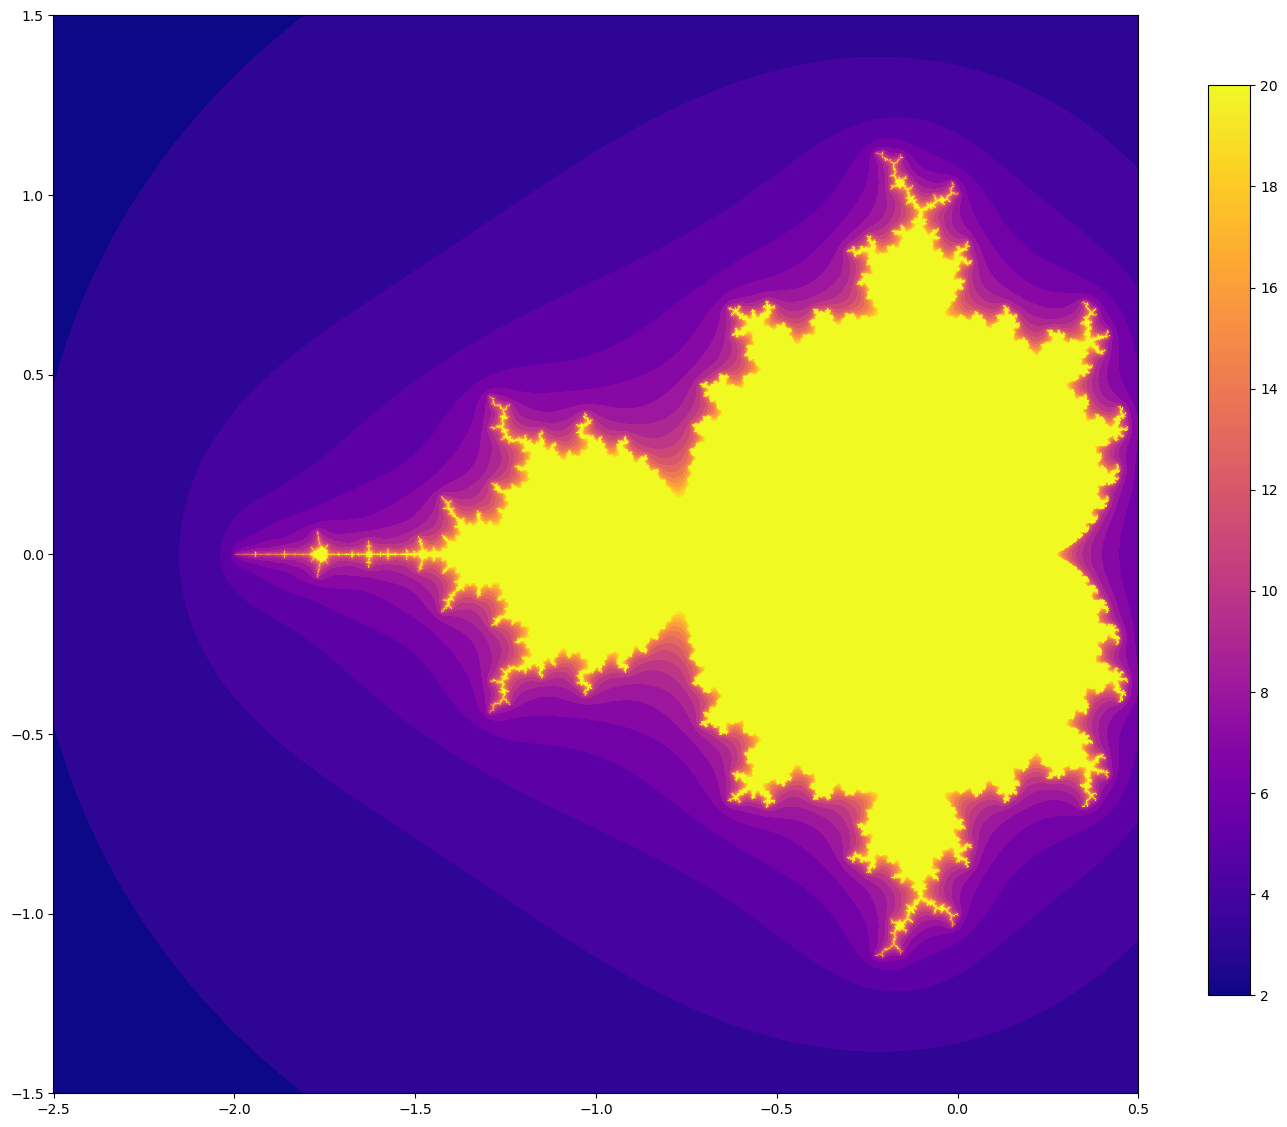

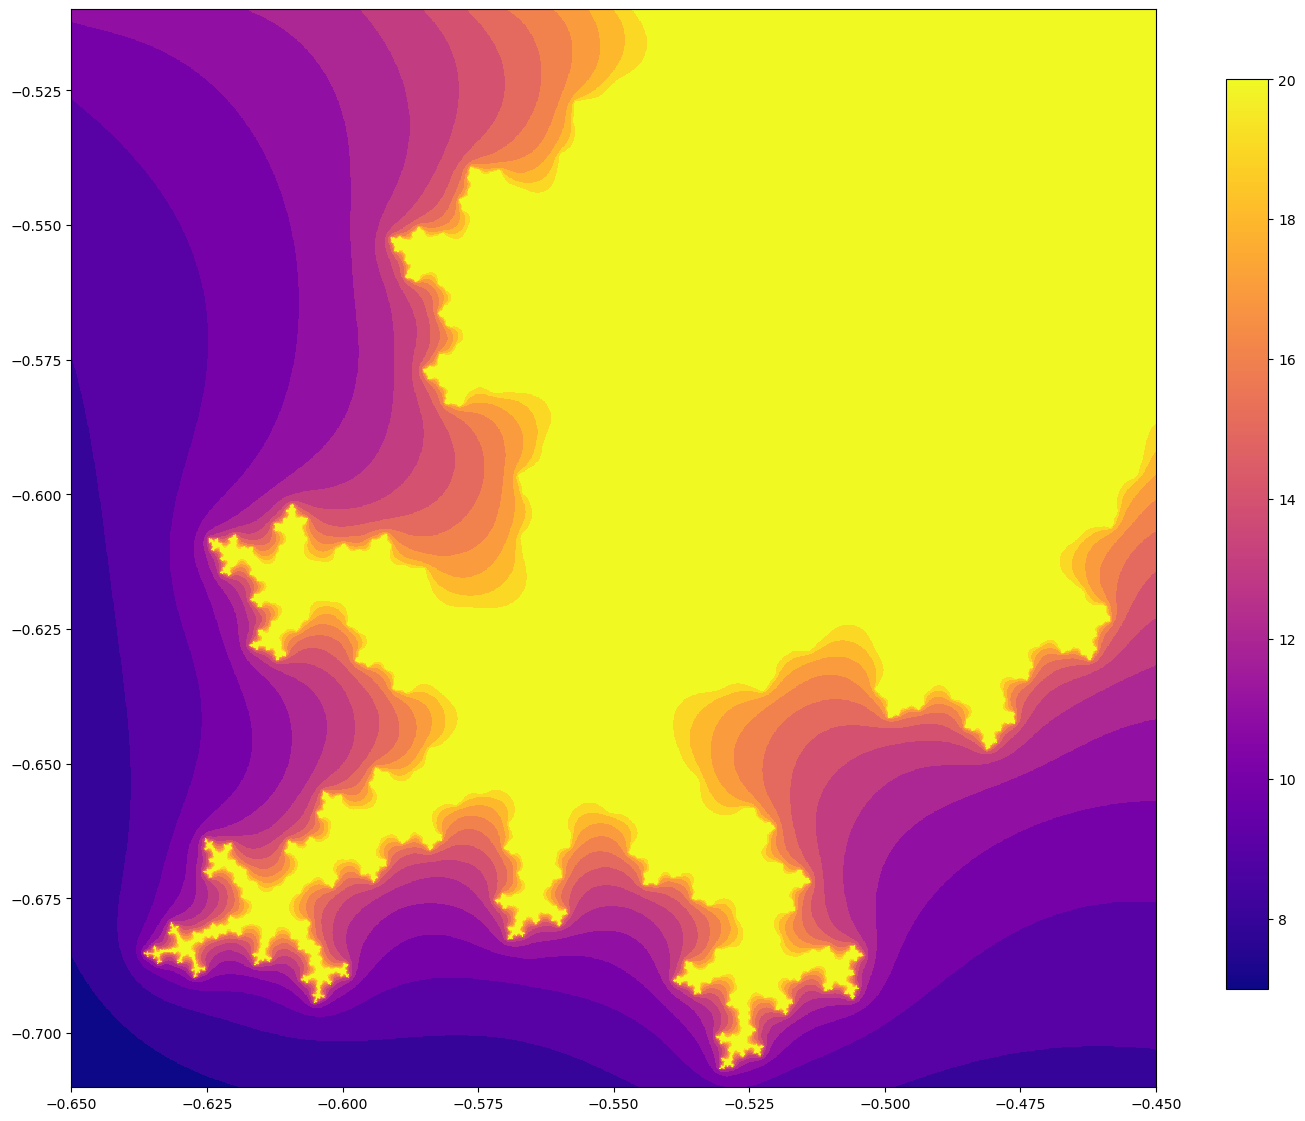

In [12]:
print(Z.shape)

Z[1500, 400:600]

(2001, 2001)


array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14])

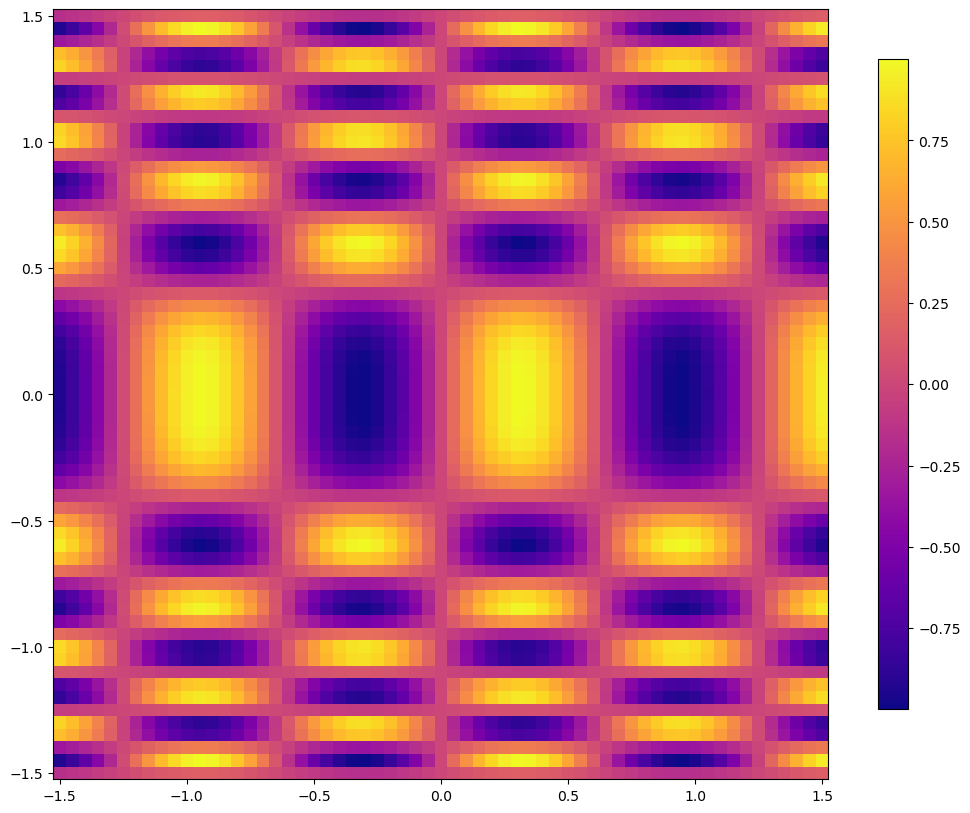

In [13]:
# framework for making colorized images of a function applied to a rectange of complex numbers
import numpy as np                                # numpy is 'numerical python', a useful library
import matplotlib.pyplot as plt                   # this is our plotting machinery
from math import sqrt, sin, cos                   # some basic math functions

def z(x, y):
    '''This function calculates a scalar value from a complex number (x, y)'''
    lambda_x, lambda_y = x, y                 # don't use this lambda; but it is important for the Mandelbrot set
    this_calc = sin(x*5)*cos((3*y)**2)        # here is where the answer is calculated
    return this_calc                          # return the answer

# The next line is rather mysterious. I do not understand it but it has the effect of taking the
# function above, z() and enabling it to run for all the values of (x, y) we care about. So it is
# doing the for-loops over the complex plane without any for-loops. Very convenient.
z2 = np.vectorize(z)

# epsilong controls how fine-grained our image is: It is the step size on the complex plane
epsilon = .05

# We use numpy's arange() method to produce 1D arrays x and y (real and imaginative coordinates).
# They will run -1.5, -1.4, ..., 1.4, 1.5 if epsilon is 0.1. This results in a very coarse image.
# To make the image more detailed: Make epsilon smaller; but the render time will increase.
x = np.arange(-1.5, 1.5 + epsilon, epsilon)
y = np.arange(-1.5, 1.5 + epsilon, epsilon)

# Here X and Y together form a numpy "meshgrid" which is just an expansion of both x and y to
# give the coordinates of every point in the region. That's fed into that z2() function above.
# For more: https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy
X, Y = np.meshgrid(x, y)

# Now we calculate a 2D numpy array (technically the variable type is 'ndarray' for n-dimensional array)
# that will be the basis of our figure. Again it uses z2() to run z() on every point in the array.
Z = z2(X, Y)

# At last our figure exists as a blank canvas
fig, ax = plt.subplots(figsize=(10,10))

# Look up matplotlib colortable list for some alternatives if you like
my_cmap = 'plasma'

# This draws the image of the data. The first argument is a list of x coordinates, the second is 
# the y coordinates, the third is the Z value at each location, and cmap is short for color map.
# That colormap is applied to Z. But notice that colors are assigned automatically; no work by us.
im=ax.pcolormesh(x, y, Z, cmap=my_cmap)

# I am putting a "colorbar" next to the figure for reference
cax = fig.add_axes([.95, 0.18, .03, .65])

# This colorbar shows us the range of values in our Z data.
fig.colorbar(im, cax=cax, orientation='vertical')

# Without further ado, what did we get?
plt.show()

In [15]:
# cat code

def z(x, y):
    lambda_x, lambda_y = x, y                
    xp, yp = lambda_x, lambda_y
    dist = sqrt(lambda_x**2 + lambda_y**2)
    
    for i in range(50):    
        xpc= xp
        xp = (x**3 - (3 * xp * yp**2))
        yp = (3 * yp * xpc**2) - yp**3
        
        xp += lambda_x
        yp += lambda_y
        
        dist = sqrt(xp**2 + yp**2)
        
        if (dist > 2):
            break
    return i

## Finding available options


We want the interface to suggest available options. For each of the following lines: Place the cursor
directly after the initial text and hit the <tab> key.

```
plt                                                   # tab does nothing
plt.                                                  # tab lists many many available methods
plt.plot                                              # lists three possible methods
plt.sub                                               # lists six possible methods
plt.subplots                                          # try <shift>+<tab> to get a pop-up documentation box 
```

#### Additional access options

* < shift > + < tab > + < tab > gives an extended summary
* < shift > + < tab > + < tab > + < tab > + < tab > brings up an extended summary in a pop-up window
* **`plt.subplots?`** shows documentation in a separate window (dismiss using X at upper right)
* **`plt.subplots??`** shows the source code (run the following cell)

In [ ]:
plt.subplots??

## Inserting graphics from a GitHub repository

This code makes a temporary copy of a github-based image and displays it in the notebook. This can make use 
of images that are not part of the working repository.


```
import requests, shutil
from pathlib import Path
from PIL import Image

username, repo, folder, fnm = 'robfatland', 'othermathclub', 'images/egon', 'shingle_house.jpg'
ftmp = str(Path.home()) + '/tmp_' + fnm
f = 'https://raw.githubusercontent.com/' + username + '/' + repo + '/master/' + folder + '/' + fnm
a = requests.get(f, stream = True)
if a.status_code == 200:
    with open(ftmp, 'wb') as f: a.raw.decode_content = True; shutil.copyfileobj(a.raw, f)
Image.open(ftmp).resize((500,300))
```